<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/InsectDetection/Step_1_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
my_folder_path = 'https://drive.google.com/drive/folders/1J_XyVRFE15SzLjFtT4Z1OrabYlNeDHGQ?usp=share_link'

In [3]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 279, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 279 (delta 108), reused 135 (delta 90), pack-reused 113
Receiving objects: 100% (279/279), 77.70 MiB | 15.40 MiB/s, done.
Resolving deltas: 100% (178/178), done.


In [4]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.0 MB/s eta 0:00:00


In [ ]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

**Step 1 - Segmentation with applying Thresh**

In [ ]:
import os
path = os.listdir('/content/drive/MyDrive/Insect/Training')
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}

In [ ]:
import cv2

img_no = 1
x = []
y = []
z = []
histo = []

for cls in classes:
    input_path = '/content/drive/MyDrive/Insect/Training/' + cls
    output_path = '/content/drive/MyDrive/Insect/Preprocessed/' + cls

    # Create output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for j in os.listdir(input_path):
        realimage = cv2.imread(os.path.join(input_path, j), 1)

        # Preprocessing steps
        resizedImage = cv2.resize(realimage, (400, 400))

        color_contrastImage = img_as_ubyte(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))

        smooth_image = img_as_ubyte(cv2.GaussianBlur(color_contrastImage, (5, 5), 0, borderType=cv2.BORDER_CONSTANT))

        R, G, B = cv2.split(smooth_image)
        op_R = cv2.equalizeHist(R)
        op_G = cv2.equalizeHist(G)
        op_B = cv2.equalizeHist(B)
        histogram_image = cv2.merge((op_R, op_G, op_B))

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        op2_R = clahe.apply(R)
        op2_G = clahe.apply(G)
        op2_B = clahe.apply(B)
        clahe_image = cv2.merge((op2_R, op2_G, op2_B))

        x.append(clahe_image)
        y.append(classes[cls])
        z.append(realimage)
        histo.append(histogram_image)

        img_no += 1

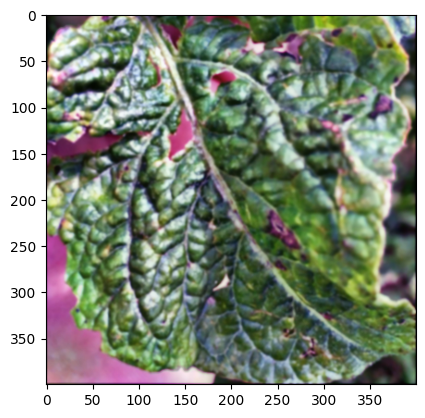

In [ ]:
plt.imshow(x[150])

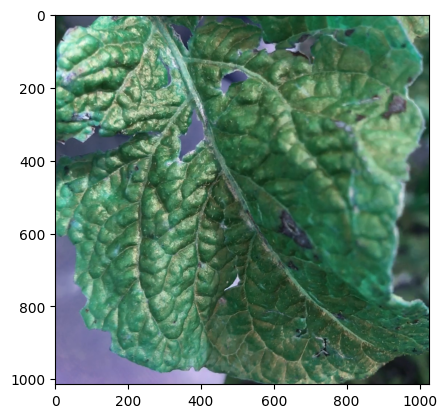

In [ ]:
plt.imshow(z[150])

In [ ]:
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}
class_counts = {}

for cls in classes:
    pth = '/content/drive/MyDrive/Insect/bgremoveImagesNew/' + cls
    file_count = len([f for f in os.listdir(pth) if os.path.isfile(os.path.join(pth, f))])
    class_counts[cls] = file_count

# Print the number of images for each class
for cls, count in class_counts.items():
    print(f"Number of images for class {cls}: {count}")

Number of images for class Insect_Coloradopotatobeetle: 400
Number of images for class Insect_Fleabeetle: 409


In [ ]:
classes = ['Insect_Coloradopotatobeetle', 'Insect_Fleabeetle']
output_base_path = '/content/drive/MyDrive/Insect/bgremoveImagesNew/'

img_no = 1  # Counter for saving the processed images

for cls in classes:
    input_path = f'/content/drive/MyDrive/Insect/preprocessing_augmentation/{cls}'

    # Create the output directory for the class if it doesn't exist
    output_path = os.path.join(output_base_path, cls)
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for j, file in enumerate(os.listdir(input_path)):
        image_path = os.path.join(input_path, file)
        realimage = cv2.imread(image_path, 1)
        img1 = cv2.resize(realimage, (400, 400))
#The image data type is converted to uint8 using img_as_ubyte() function from skimage library.
        new_img = img_as_ubyte(img1)
        bg_rem_img = remove(new_img)
        bg_rem_img_BGR = cv2.cvtColor(bg_rem_img, cv2.COLOR_BGR2RGB)
        x.append(bg_rem_img)

        output_file = os.path.join(output_path, f'{img_no}.jpg')
        #cv2.imwrite(output_file, bg_rem_img_BGR)

        img_no += 1

print("Removing bg and saving complete!")

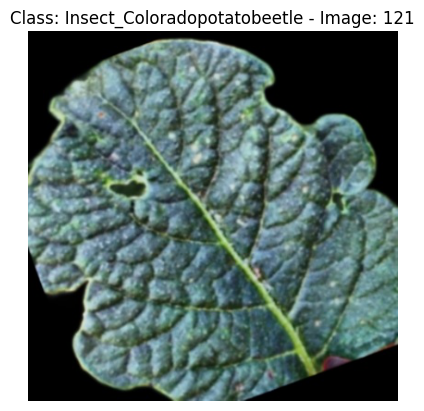

In [ ]:
import matplotlib.pyplot as plt

# Path to the directory containing the processed images
processed_images_path = '/content/drive/MyDrive/Insect/bgremoveImagesNew'

# Function to display a specific image
def show_image(cls, img_num):
    class_output_path = os.path.join(processed_images_path, cls)
    image_path = os.path.join(class_output_path, f'{img_num}.jpg')
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(f'Class: {cls} - Image: {img_num}')
    plt.axis('off')
    plt.show()

# Choose the image to display 121, 122, 201,123,12,15,1,52
cls = 'Insect_Coloradopotatobeetle'
img_num = 121

# Display the chosen image
show_image(cls, img_num)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split

In [ ]:
# Function to convert image to grayscale
def convert_to_grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

# Function to extract texture features
def extract_texture_features(images):
    features = []
    for img in images:
        gray = convert_to_grayscale(img)

        # Calculate Haralick texture features
        glcm = greycomatrix(gray, distances=[1], angles=[0, np.pi / 4, np.pi / 2, 3 * np.pi / 4], levels=256, symmetric=True, normed=True)
        contrast = greycoprops(glcm, 'contrast')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        correlation = greycoprops(glcm, 'correlation')[0, 0]

        texture_features = np.array([contrast, energy, homogeneity, correlation])
        features.append(texture_features)

    return np.array(features)

path = '/content/drive/MyDrive/Insect/bgRemove/'
classes = {'Colorado': 0, 'flea': 1}

x = []
y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 1)
        mask = np.full_like(img, (0, 255, 0), dtype=np.uint8)
        result = cv2.bitwise_and(img, mask)

        # Convert result to grayscale
        gray = convert_to_grayscale(result)

        # Apply thresholding to segment the insect harm region
        _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

        # Resize the mask to match the size of the original image
        mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]))

        # Create a binary mask from the resized mask
        mask_binary = cv2.bitwise_not(mask_resized)

        # Apply the binary mask to the original image
        insect_harm_region = cv2.bitwise_and(img, mask_binary)

        x.append(insect_harm_region)
        y.append(classes[cls])

x = np.array(x)
y = np.array(y)

# Extract texture features
x_texture_features = extract_texture_features(x)

# Prepare data
x_updated = x.reshape(len(x), -1)
x_updated = np.concatenate((x_updated, x_texture_features), axis=1)
x_updated.shape

# Feature Scaling
x_updated = x_updated / 255

# Standardize the dataset
sc = StandardScaler()
sc.fit(x_updated)
x_std = sc.transform(x_updated)

# Feature extraction and dimensionality reduction using PCA
pca = PCA(n_components=0.98)
x_pca = pca.fit_transform(x_std)

# Split dataset into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=65, test_size=0.2)

import xgboost as xgb

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Evaluate the model
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Training Score: 0.975
Test Score: 0.9375


In [ ]:
# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Evaluate the model
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))

Training Score: 0.975
Test Score: 0.9375
